In [1]:
##----------Projeto Análise Exploratória de Dados e Aprendizado de Máquina##
## ---------Guilherme Mendes de Olivera

#Import de Bibliotecas
import pandas as pd
import numpy as np
import sklearn as sck
import matplotlib.pyplot as plt
import seaborn as sn
import os

#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [20, 15]

In [2]:
""""
Descrição das Colunas:

id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

"""""
#A chamada remove cria recursão ? tem que ter o condicional
def colsWithoutParametro(cols,param):
    if param in cols:
        cols.remove(param)
    return cols

#Casas por número de quartos
# cols = ['id','date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade',
#         'sqft_above','sqft_basement', 'yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

#param = 'bedrooms'
#colsWithouBedrooms = colsWithoutParametro(cols,param)

In [97]:
#Carregando a base de dados
pathFile = 'C:/Users/BBS30344/Documents/Data Science/kc_house_data.csv'
dfHouse = pd.read_csv(pathFile)

#Amostra aleatória do Datafra em x linhas
x = 5
dfHouse.sample(x)
#dfHouse.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6242,7852110050,20140625T000000,574000.0,3,2.50,2380,6832,2.0,0,0,3,8,2380,0,2002,0,98065,47.5372,-121.876,2580,6832
351,2757000030,20140922T000000,855000.0,4,2.75,2270,10460,2.0,0,0,3,9,2270,0,1965,0,98040,47.5603,-122.222,2610,10180
17016,2346200050,20141017T000000,760369.0,5,2.50,2870,4712,2.0,0,0,3,9,2870,0,2014,0,98006,47.5463,-122.182,2870,6768
18390,6639900176,20141114T000000,551000.0,3,2.50,2010,17362,2.0,0,0,3,8,2010,0,1994,0,98033,47.6904,-122.176,1920,7200
13447,2652501215,20140702T000000,860000.0,4,1.75,1880,3720,1.5,0,0,4,7,1880,0,1924,0,98109,47.6431,-122.356,2090,4095


## Casas por quantidade de quartos

In [4]:
dfHouse['count'] = 1
ByNumberBedrooms = dfHouse.groupby('bedrooms').count()['count']
dfHouse= dfHouse.drop('count', axis=1)
#print(ByNumberBedrooms)
ByNumberBedrooms = ByNumberBedrooms.to_dict()
#ByNumberBedrooms 
bedrooms = list(ByNumberBedrooms.keys())
#Aplica a função anônima de conversão para string a cada elemento da lista numQuartos
bedrooms = list(map(lambda x:str(x),bedrooms))
countBedrooms = list(ByNumberBedrooms.values())
# dfHouse.loc[dfHouse['bedrooms'] == 33]

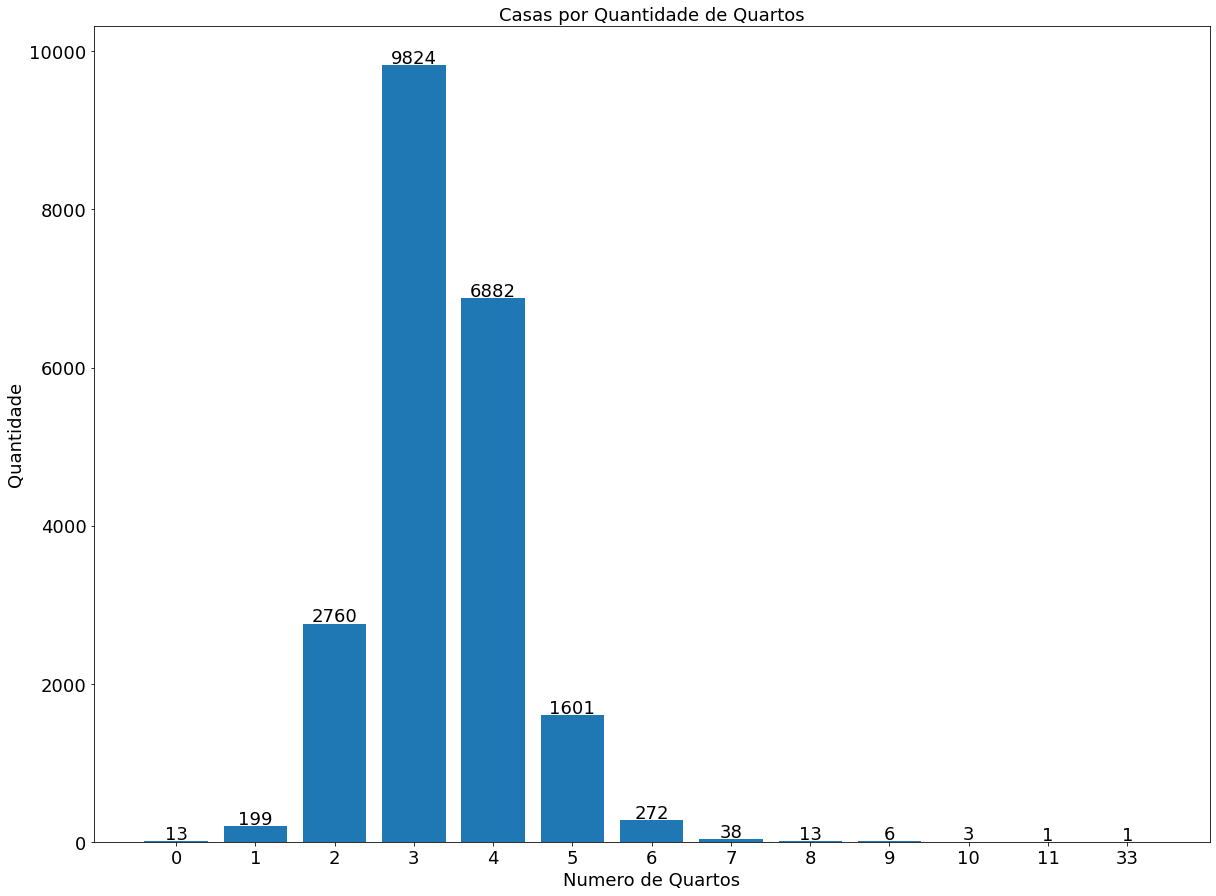

In [5]:
#Texto dos Eixos e Titulo
plt.title("Casas por Quantidade de Quartos", fontsize=18)
plt.ylabel(('Quantidade'),fontsize=18)
plt.xlabel(('Numero de Quartos'),fontsize=18)

#Valores dos eixos
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.bar(bedrooms,countBedrooms)

#Recebe o objeto gráfico?
ax = plt.gca()


#i recebe o indice, bar recebe a barra
for i, bar in enumerate(ax.patches):
    #Recebe a altura da barra
    h = bar.get_height()
    #Cria a anotação do rótulo de dados
    ax.text(
        i, #Indice da barra em x
        h+25, # #Indice da barra em y +25
        '{}'.format(int(h)),  #valor do rótulo
        ha='center', 
        #va='center', 
        #fontweight='bold', 
        size=18)
    
plt.show()

## Casas por Condição

In [6]:
dfHouse['count'] = 1
byCondition = dfHouse.groupby('condition').count()['count']
byCondition = byCondition.to_dict()
#byCondition
conditions = list(byCondition.keys())
#Aplica a função anônima de conversão para string a cada elemento da lista numQuartos
conditions = list(map(lambda x: str(x),conditions))
numberCondition = list(byCondition.values())

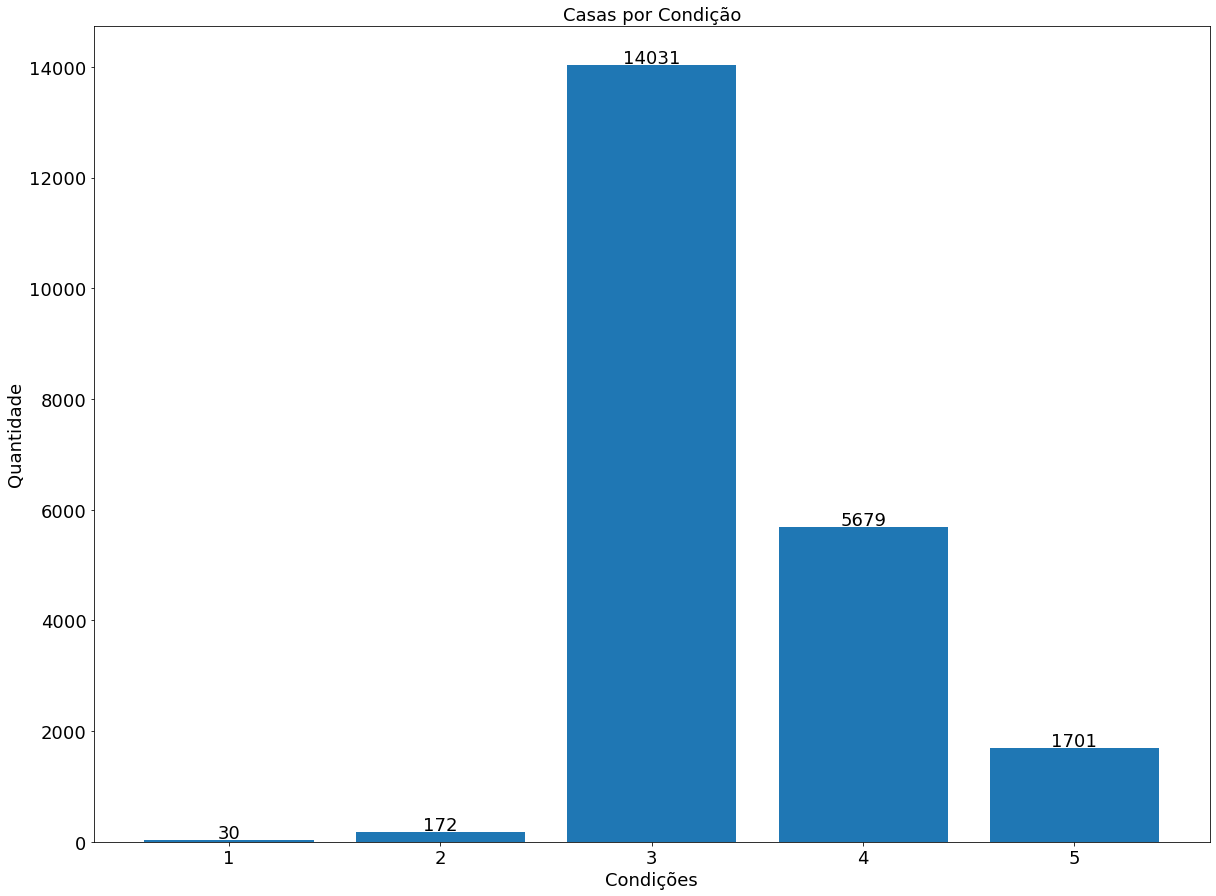

In [7]:
#Texto dos Eixos e Titulo
plt.title("Casas por Condição", fontsize = 18)
plt.ylabel("Quantidade", fontsize = 18)
plt.xlabel("Condições", fontsize = 18)

#Valores dos eixos
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.bar(conditions,numberCondition)

#Recebe o objeto gráfico?
ax = plt.gca()

#i recebe o indice, bar recebe a barra
for i, bar in enumerate(ax.patches):
    #Recebe a altura da barra
    h = bar.get_height()
    #Cria a anotação do rótulo de dados
    ax.text(
        i, #Indice da barra em x
        h+35, # #Indice da barra em y +25
        '{}'.format(int(h)),  #valor do rótulo
        ha='center', 
        #va='center', 
        #fontweight='bold', 
        size=18)
    
plt.show()

## Concentração de Casas

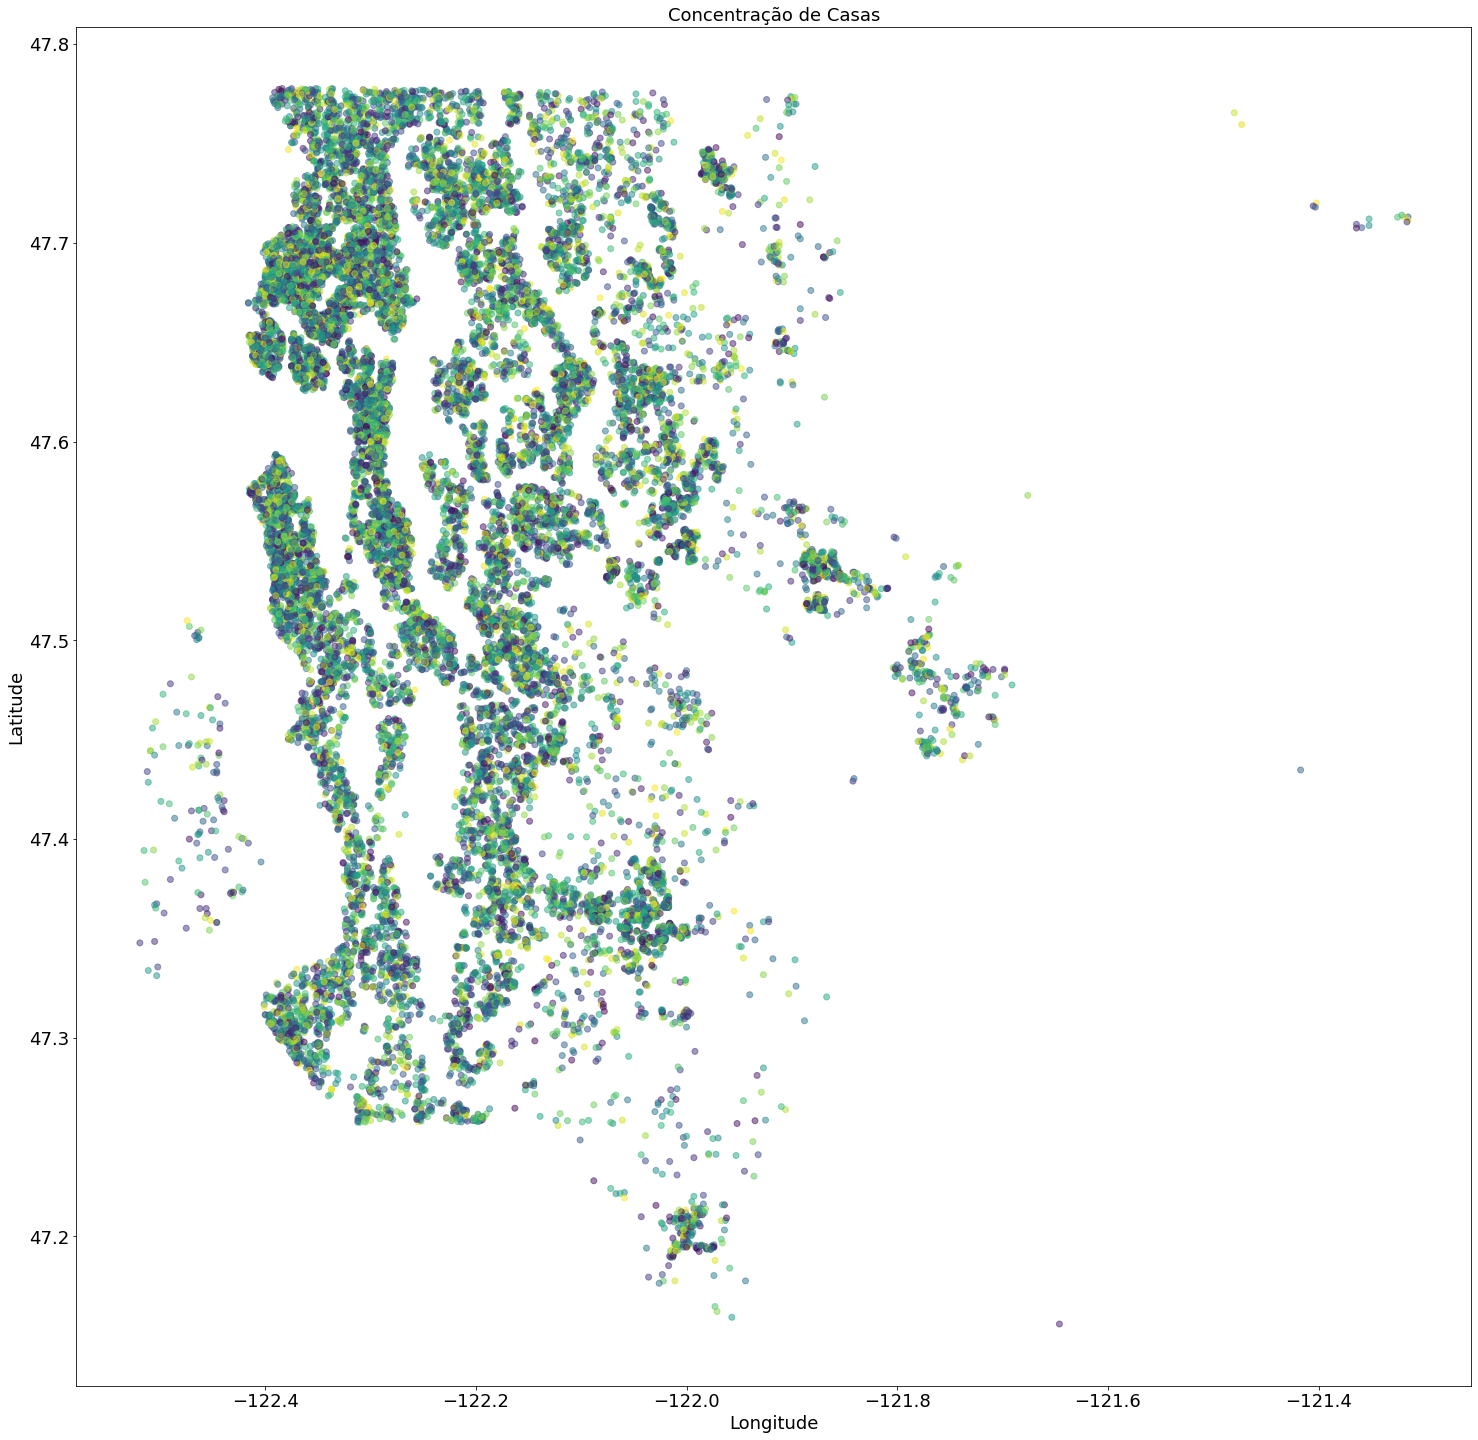

In [8]:
plt.rcParams['figure.figsize'] = [25, 25]
latY = list(dfHouse['lat'])
lonX = list(dfHouse['long'])

nColors = len(latY)
colors = np.random.rand(nColors)

#Texto dos Eixos e Titulo
plt.title('Concentração de Casas',  fontsize = 18)
plt.xlabel('Longitude', fontsize = 18)
plt.ylabel('Latitude',  fontsize = 18)

#Valores dos eixos
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.scatter(lonX, latY, c = colors , alpha = 0.5)
plt.show()

## Preço Médio e Condição Média

In [9]:
meanPrice = dfHouse['price'].mean()
meanPrice
meanCondition = dfHouse['condition'].mean()
meanCondition

print("Preco Médio U$ {:.2f}\nCondição Média {:.2f}".format(meanPrice, meanCondition))

Preco Médio U$ 540088.14
Condição Média 3.41


## Desvio Padrão de Preços -  Mede o quão homogênea é a distribuição dos preços

In [96]:
prices = list(dfHouse['price'])
dpPrices = np.std(prices)
print('Desvio padrão é de {:.2f}' .format(dpPrices))
#print(dfHouse['price'].std())

Desvio padrão é de 367118.70


###### A amostra é muito dispersa em relação a média como podemos perceber na distribuição abaixo

In [11]:
byPrice = dfHouse.groupby('price').count()['count']
byPrice = byPrice.to_dict()
prices = list(byPrice.keys())
pricesCount = list(byPrice.values())
pricesCount = list(map(lambda x : str(x),pricesCount))
#dfHouse['price'].describe()

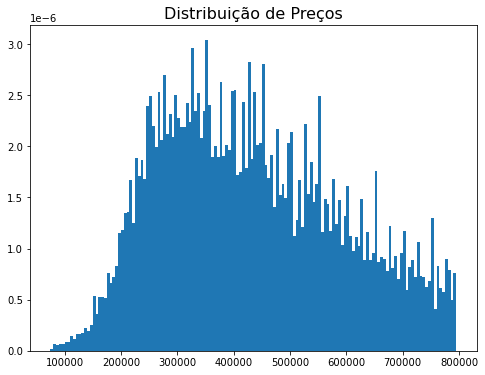

In [25]:
plt.rcParams['figure.figsize'] = [8, 6]
#Texto dos Eixos e Titulo
plt.title("Distribuição de Preços", fontsize = 16)
plt.hist(x= dfHouse['price'], density=True, bins=range(75000, 800000,5000))
plt.show()

In [13]:
dfHouse['price'].skew()

4.024069144684712

####  Podemos ver que a cauda tende muito para a esquerda no gráfico comprovado pelo skew que é positivo (moda < mediana < média) e relativamente grande , negativo (média < mediana < moda) indicaria tendencia para a direita e 0 uma distribuição simétrica.
###### Moda valor que mais se repete
###### Mediana divide o conjuto ordenado no meio
###### Média pode ser traduzida a grosso modo como um ponto de equilibrio dos valores

## Correlação
#### Mede o grau de dependência entre as variáveis nesse caso pelo contexto causal, mas não necessariamente
#### A Hipotese é que condições, vista e área construida influenciam no preço

##### Podemos observar que as condições dos imóveis não tem uma correlação tão forte quanto o tamanho do lote construido que é forte 0.7 e a vista que é moderada 0.4

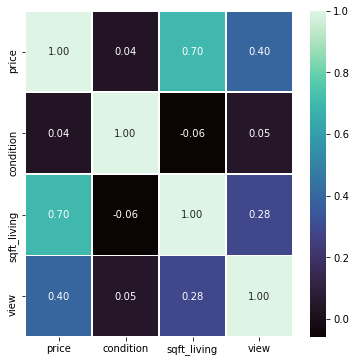

In [14]:
dfPriceConditionSqftLivView = dfHouse[['price', 'condition','sqft_living','view']]
correlation = dfPriceConditionSqftLivView.corr()
plt.rcParams['figure.figsize'] = [6, 6]
plot = sn.heatmap(correlation, annot = True, fmt=".2f", linewidths=.6, cmap= 'mako')

## Classificação de Casas porPreço

In [15]:
dfHouse['QuartilPreço'] = 'xº'
quartilPrice = dfHouse.price.quantile([0.25,0.5,0.75])
quartilPrice = quartilPrice.tolist()
#print(quartilPrice)

#### Vendo a quartilização podemos classificar os preços de 0 a 321.950 como preços muito baixos de 321.950 até 450.000 como preços baixos e 450.000 até 645.000 preços regulares e acima de 645.000 preços altos.

In [17]:
dfHouse.loc[dfHouse['price'] < quartilPrice[0], 'QuartilPreço'] = '4º'
dfHouse.loc[(dfHouse['price'] >= quartilPrice[0]) & (dfHouse['price'] < quartilPrice[1]), 'QuartilPreço'] = '3º'
dfHouse.loc[(dfHouse['price'] >= quartilPrice[1]) & (dfHouse['price'] < quartilPrice[2]), 'QuartilPreço'] = '2º'
dfHouse.loc[dfHouse['price'] >= quartilPrice[2], 'QuartilPreço'] = '1º'

In [18]:
#Quantidade de elementos por Quartil
dfHouse.groupby('QuartilPreço').count()['count']

QuartilPreço
1º    5413
2º    5508
3º    5289
4º    5403
Name: count, dtype: int64

## Concentração de Casas conforme sua faixa de preço

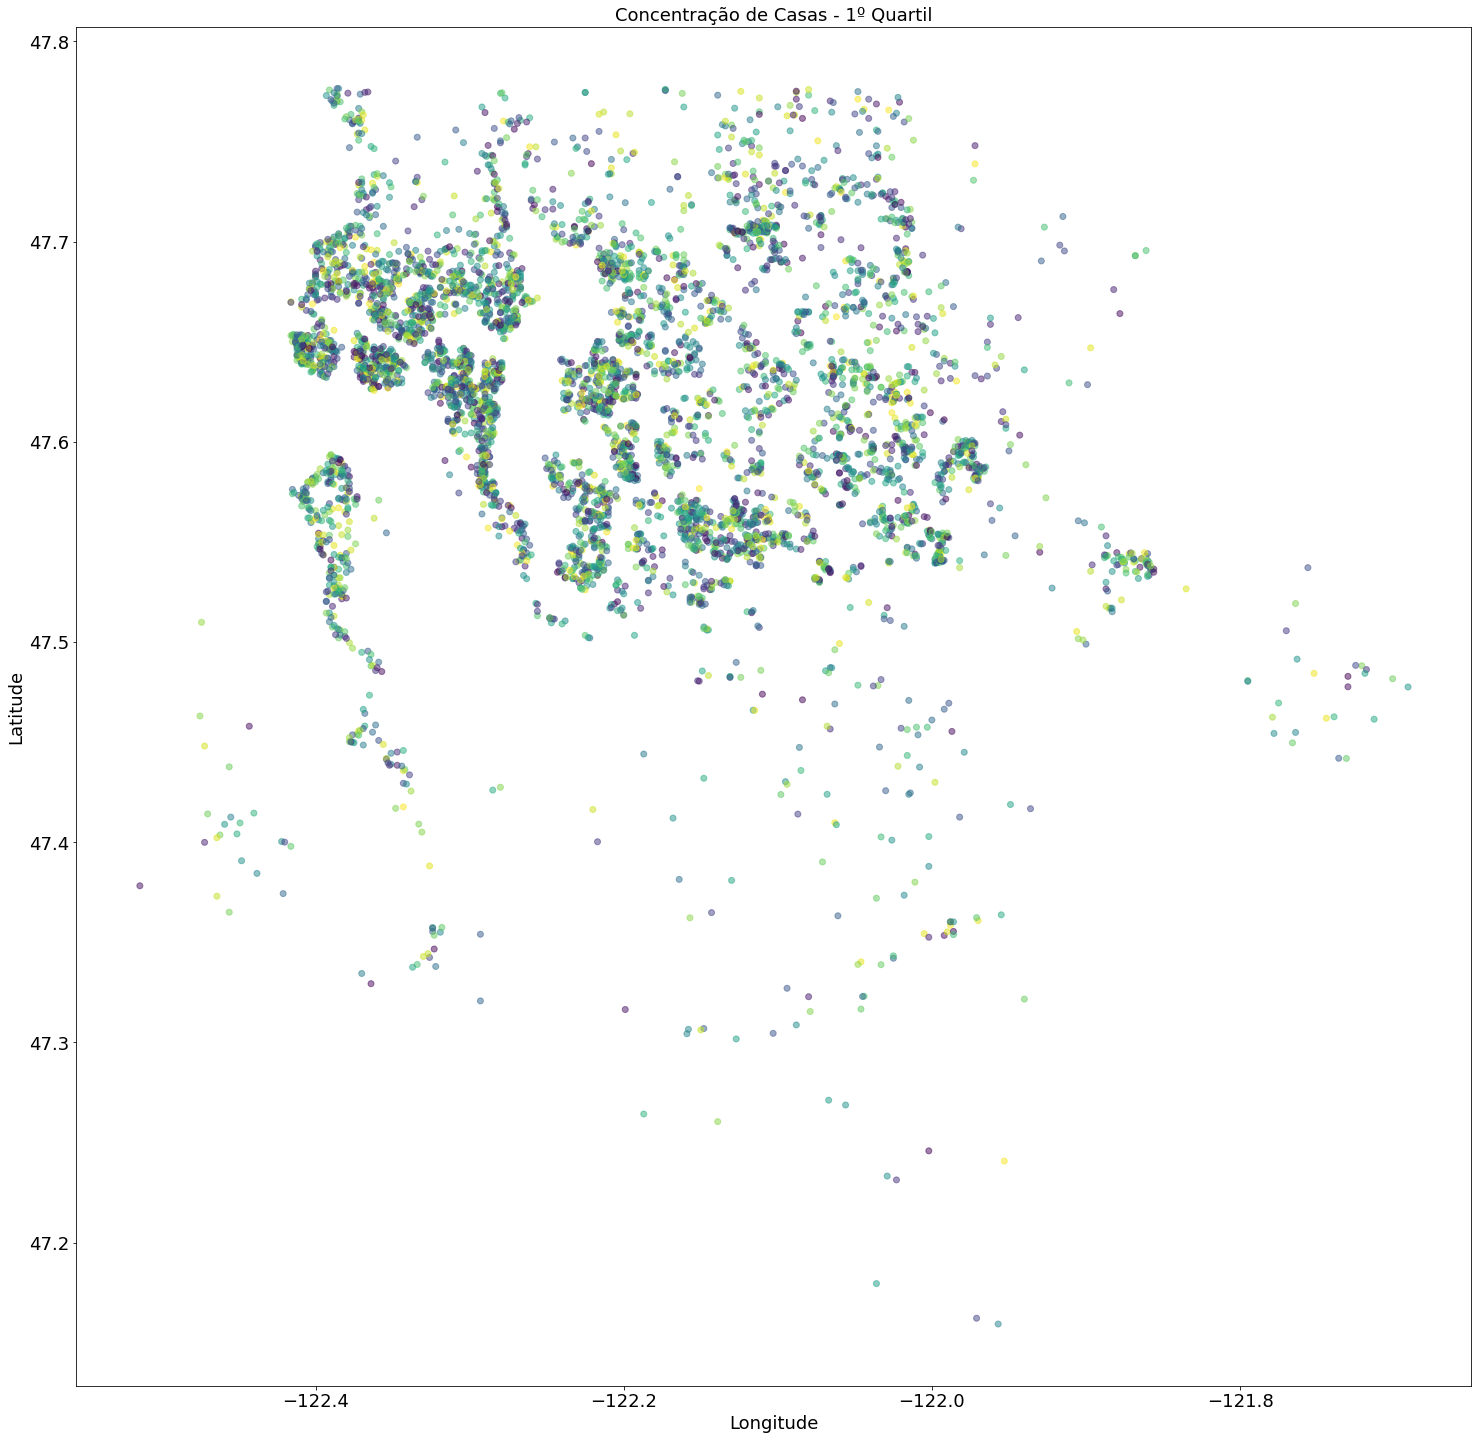

In [19]:
plt.rcParams['figure.figsize'] = [25, 25]

dfHouseA = dfHouse.loc[dfHouse['QuartilPreço'] == '1º']
AlatY = list(dfHouseA['lat'])
AlonX = list(dfHouseA['long'])
nColors = len(AlatY)
colors = np.random.rand(nColors)

#Texto dos Eixos e Titulo
plt.title('Concentração de Casas - 1º Quartil',  fontsize = 18)
plt.xlabel('Longitude', fontsize = 18)
plt.ylabel('Latitude',  fontsize = 18)

#Valores dos eixos
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.scatter(AlonX, AlatY, c = colors , alpha = 0.5)
plt.show()

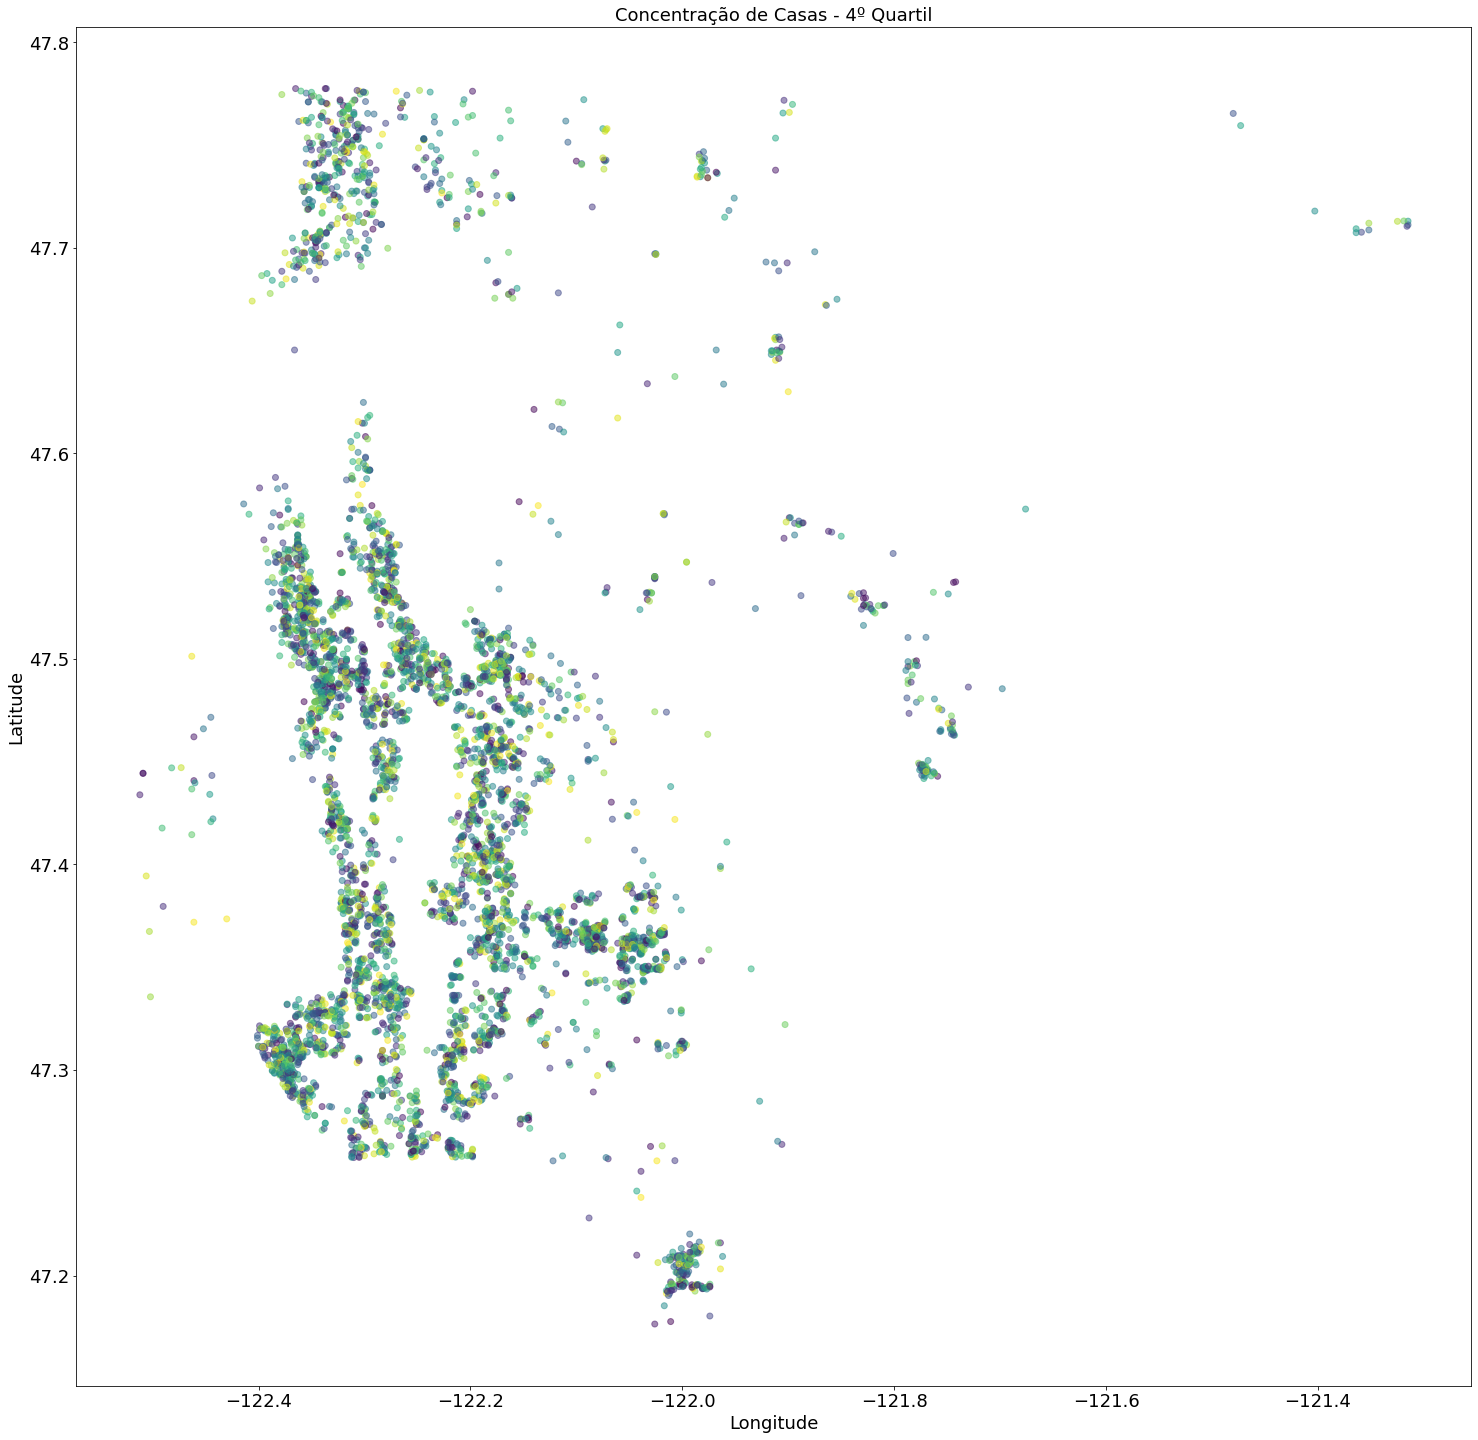

In [20]:
plt.rcParams['figure.figsize'] = [25, 25]

dfHouseD = dfHouse.loc[dfHouse['QuartilPreço'] == '4º']
DlatY = list(dfHouseD['lat'])
DlonX = list(dfHouseD['long'])
nColors = len(DlatY)
colors = np.random.rand(nColors)

#Texto dos Eixos e Titulo
plt.title('Concentração de Casas - 4º Quartil',  fontsize = 18)
plt.xlabel('Longitude', fontsize = 18)
plt.ylabel('Latitude',  fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.scatter(DlonX, DlatY, c = colors , alpha = 0.5)
plt.show()

#### Podemos perceber uma concentração maior de imóveis mais baratos em "regiões" mais ao sul enquanto os mais caros estão ao norte (observando a faixa de latitude acima e abaixo de 47.5)

## Média do Tempo que um imóvel é reformado 

In [94]:
dfHouseRenovated = dfHouse.loc[dfHouse['yr_renovated'] != 0]
dfHouseRenovated = dfHouseRenovated.copy()
dfHouseRenovated['dfHouseRenovated'] = dfHouseRenovated['yr_renovated'] - dfHouseRenovated['yr_built']

print('Tempo média de reforma é {:.2f} anos'.format(dfHouseRenovated.renovationTime.mean()))

Tempo média de reforma é -56.30 anos


## Reformas ao Longo do Ano

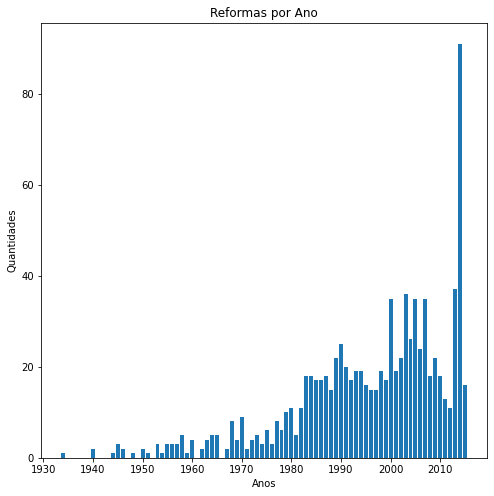

In [90]:
countRenovatedByYear = dfHouseRenovated.groupby('yr_renovated').sum()['count']
countRenovatedByYear = countRenovatedByYear.to_dict()

years = countRenovatedByYear.keys()
#years = list(map(lambda x:str(x),years))

count = countRenovatedByYear.values()
#count = list(map(lambda x:str(x),count))

plt.rcParams['figure.figsize'] = [8,8]
#plt.rcParams['figure.figsize'] = [50,50]

plt.title('Reformas por Ano')
plt.xlabel('Anos')
plt.ylabel('Quantidades')

plt.bar(years,count)
plt.show()
#plt.savefig('Reformas_por_Ano.png')

##### Observamos um aumento das reformas dos anos 80 até os anos 90 e depois um novo crecimento proximo aos anos 2000 e após 2010

## Correlação

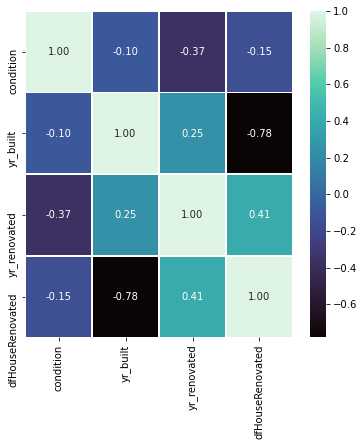

In [95]:
dfHouseRenovated = dfHouseRenovated[['condition','yr_built','yr_renovated','dfHouseRenovated']]
correlation = dfHouseRenovated.corr()
plt.rcParams['figure.figsize'] = [6, 6]
plot = sn.heatmap(correlation, annot = True, fmt=".2f", linewidths=.6, cmap= 'mako')

##### Podemos ver que temos uma correlação pertinente do ano da reforma com a idade da costrução (0.4) mas isso não nos mostra que há uma "depreciação" na condição uma vez que a correlação com a condição do imóvel com seu tempo de construção é muito fraca, podemos levantar uma hipótese de que as reformas estão mais relacionadas a melhorias do que reparos mas não temos como concluir apenas com os dados do dataset